In [11]:
#loading the reduced dataset
df_train = pd.read_csv("train_small.csv")
df_test = pd.read_csv("test_small.csv")

In [14]:
label_map = {1: "negative", 2: "positive"}

df_train["sentiment_text"] = df_train["label"].map(label_map)
df_test["sentiment_text"]  = df_test["label"].map(label_map)

df_train[["label", "sentiment_text"]].head()

,label,sentiment_text
0,2,positive
1,2,positive
2,1,negative
3,2,positive
4,2,positive


In [45]:
df_train_small["clean_review"] = df_train_small["review"].apply(clean_text)
df_test_small["clean_review"]  = df_test_small["review"].apply(clean_text)

In [29]:
import joblib

joblib.dump(log_reg, "logreg_tfidf_model.joblib")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [33]:
import joblib

joblib.dump(svm_clf, "svm_tfidf_model.joblib")

['svm_tfidf_model.joblib']

In [46]:
df_train_small.to_csv("train_small.csv", index=False)
df_test_small.to_csv("test_small.csv", index=False)

In [1]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

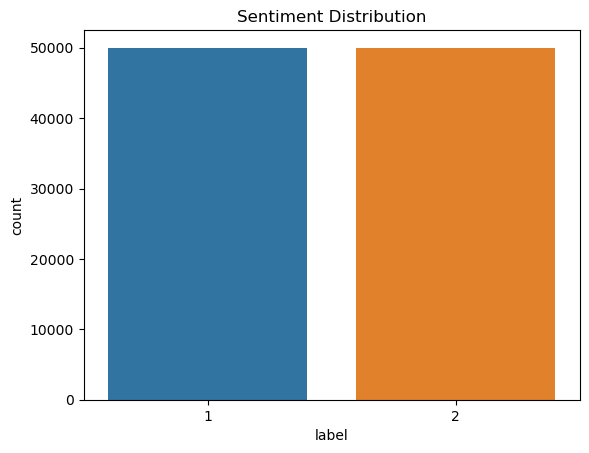

Customer Satisfaction Score: 0.5
Complaint Score: 0.5
of the 19229
in the 11943
this book 11897
it is 8563
if you 8393
it was 7820
and the 7623
on the 7619
this is 7310
to be 7216


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_train_small["label"])
plt.title("Sentiment Distribution")
plt.show()
pos_rate = (df_train_small["label"]==2).mean()
neg_rate = (df_train_small["label"]==1).mean()

print("Customer Satisfaction Score:", pos_rate)
print("Complaint Score:", neg_rate)
for phrase, freq in top_neg_bigrams[:10]:
    print(phrase, freq)

In [58]:
def predict_sentiment(text):
    X = tfidf.transform([text])
    pred = svm_clf.predict(X)[0]
    return "Positive" if pred == 2 else "Negative"

In [59]:
while True:
    user_text = input("\nEnter a review (or 'q' to quit): ")
    if user_text.lower() == "q":
        break
    print("Predicted sentiment:", predict_sentiment(user_text))


Enter a review (or 'q' to quit): q
